In [55]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization

# ładowanie danych i utworzenie data frame'u

In [57]:
tumor_dir_path='C://Users//jk/Desktop//data science - infoshare//projekt_SQL//jdszr4-edc//4-projekt-dl//Brain Tumor Data Set//Brain Tumor'
non_tumor_path='C://Users//jk/Desktop//data science - infoshare//projekt_SQL//jdszr4-edc//4-projekt-dl//Brain Tumor Data Set//Healthy'
filepaths = []
labels= []
dict_list = [tumor_dir_path, non_tumor_path]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
            labels.append('brain_tumor')
        else:
            labels.append('good_health') 
    
fpath_s = pd.Series(filepaths, name="filepaths")
lbl_s = pd.Series(labels, name="labels")
tumor_data = pd.concat([fpath_s,lbl_s], axis=1)
df = pd.DataFrame(tumor_data)
print(df["labels"].value_counts())

brain_tumor    2513
good_health    2087
Name: labels, dtype: int64


# Train test split

In [59]:
train_images, test_images = train_test_split(df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)

In [60]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(3680, 2)
(1380, 2)
(920, 2)
(3220, 2)


# Data augmentation

In [61]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=100,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=100,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=100,
                                    shuffle=False
                                   )

Found 3220 validated image filenames belonging to 2 classes.
Found 1380 validated image filenames belonging to 2 classes.
Found 920 validated image filenames belonging to 2 classes.


# Model

In [7]:
model2 = Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1), activation="relu", padding='valid',
               input_shape=(244,244,3)))

model2.add(MaxPooling2D(pool_size=(2,2)))

#adding flatten layer
model2.add(BatchNormalization())
model2.add(Flatten())

#adding dense layers
model2.add(Dense(128, activation='relu'))


#Output layer
model2.add(Dense(2, activation="softmax"))

In [8]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 121, 121, 32)      128       
_________________________________________________________________
flatten (Flatten)            (None, 468512)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               59969664  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 59,970,946
Trainable params: 59,970,882
Non-trainable params: 64
___________________________________________

# Trening

In [10]:
History = model2.fit(train, validation_data= val, epochs=15,verbose=1)

Epoch 1/15
33/33 [==============================] - 256s 8s/step - loss: 51.8536 - accuracy: 0.5274 - val_loss: 1.2541 - val_accuracy: 0.4467
Epoch 2/15
33/33 [==============================] - 230s 7s/step - loss: 0.6943 - accuracy: 0.6030 - val_loss: 0.6927 - val_accuracy: 0.5696
Epoch 3/15
33/33 [==============================] - 193s 6s/step - loss: 0.5181 - accuracy: 0.7181 - val_loss: 0.5658 - val_accuracy: 0.6935
Epoch 4/15
33/33 [==============================] - 188s 6s/step - loss: 0.3139 - accuracy: 0.9195 - val_loss: 0.4109 - val_accuracy: 0.7913
Epoch 5/15
33/33 [==============================] - 182s 5s/step - loss: 0.1056 - accuracy: 0.9676 - val_loss: 0.3503 - val_accuracy: 0.8315
Epoch 6/15
33/33 [==============================] - 184s 6s/step - loss: 0.0480 - accuracy: 0.9836 - val_loss: 0.2722 - val_accuracy: 0.8837
Epoch 7/15
33/33 [==============================] - 181s 5s/step - loss: 0.0181 - accuracy: 0.9956 - val_loss: 0.2232 - val_accuracy: 0.9152
Epoch 8/15
3

In [11]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Wykresy accuracy i loss

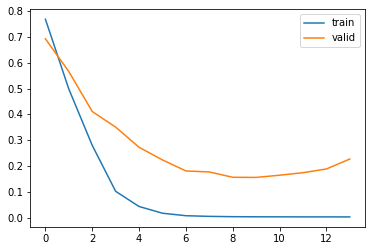

In [13]:
plt.plot(History.history['loss'][1:])
plt.plot(History.history['val_loss'][1:])
plt.legend(['train', 'valid'])
plt.show();

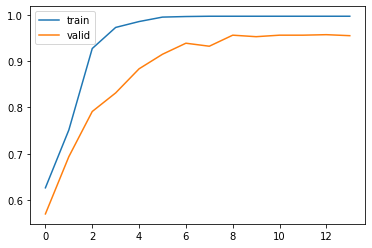

In [14]:
plt.plot(History.history['accuracy'][1:])
plt.plot(History.history['val_accuracy'][1:])
plt.legend(['train', 'valid'])
plt.show();

# Test

In [62]:
y_pred = model2.evaluate(test, verbose=1)

14/14 [==============================] - 26s 2s/step - loss: 0.1961 - accuracy: 0.9609


In [74]:
pred = model2.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

In [75]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%")

              precision    recall  f1-score   support

 brain_tumor       0.96      0.97      0.97       779
 good_health       0.96      0.95      0.95       601

    accuracy                           0.96      1380
   macro avg       0.96      0.96      0.96      1380
weighted avg       0.96      0.96      0.96      1380

Accuracy of the Model: 96.08695652173913 %
